# Compare atlas data

Here we compare our data to data from the [Atlas](https://github.com/SantanderMetGroup/ATLAS).

In [1]:
import glob
import os.path
import requests
import zipfile

import matplotlib.pyplot as plt
import netcdf_scm.io
import scmdata
import scmdata.database
import tqdm.autonotebook as tqdman

/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/scmdata/database.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
DATA_ROOT = os.path.join("..", "data")

In [3]:
FORCE_DOWNLOAD = False

In [4]:
DOWNLOADED_ZIP_FILE = os.path.join(DATA_ROOT, "raw", "compare_atlas_data.zip")
DOWNLOADED_ZIP_FILE

'../data/raw/compare_atlas_data.zip'

In [5]:
DOWNLOADED_DATA_DIR = os.path.join(DATA_ROOT, "raw", "compare_atlas_data")
DOWNLOADED_DATA_DIR

'../data/raw/compare_atlas_data'

In [6]:
 experiments_to_download = (
    "ssp126",
    "ssp245",
    "ssp585",
    "rcp26",
    "rcp45",
    "rcp85",
    "historical",
)

variables_to_download = (
    "tas",
)

if FORCE_DOWNLOAD:
    if os.path.isdir(DOWNLOADED_DATA_DIR):
        shutil.rmtree(DOWNLOADED_DATA_DIR)

if not os.path.isdir(DOWNLOADED_DATA_DIR):
    print("Downloading relevant data")
    for exp in tqdman.tqdm(experiments_to_download, desc="experiment"):
        for var in tqdman.tqdm(variables_to_download, desc="variable", leave=False):
            params = (
                ("experiment_id", exp),
                ("variable_id", var),
                ("normalised", ""),
                ("timeseriestype", "monthly"),
            )
            url = "https://cmip6.science.unimelb.edu.au/api/v1/download_zip"
            r = requests.get(url, params=params)

            with open(DOWNLOADED_ZIP_FILE, "wb") as f:
                f.write(r.content)

            zip_ref = zipfile.ZipFile(DOWNLOADED_ZIP_FILE, "r")
            zip_ref.extractall(DOWNLOADED_DATA_DIR)
            zip_ref.close()

In [7]:
with open(os.path.join(DOWNLOADED_DATA_DIR, "README.txt"), "r") as fh:
    print(fh.read())

README
------

Acknowledging CMIP

The data provided here are derived from the outputs of the `Coupled Model Intercomparison Project <https://www.wcrp-climate.org/wgcm-cmip>`_ data.
This means that you **must** abide by the terms of use of the data, in particular the required acknowledgement statements (see the `CMIP5 terms of use <https://pcmdi.llnl.gov/mips/cmip5/terms-of-use.html>`_ and `CMIP6 terms of use <https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html>`_).

To make it easier to do this, we have developed some basic tools which simplify the process of checking model license terms and creating the tables required in publications to cite CMIP data (see the `our tools here <https://netcdf-scm.readthedocs.io/en/latest/usage/using-cmip-data.html>`_).
However, we provide no guarantees that these tools are up to date so all users should double check that they do in fact produce output consistent with the terms of use referenced above (and if there are issues, please raise an i

In [8]:
tas_files = sorted(
    glob.glob(
        os.path.join(DOWNLOADED_DATA_DIR, "**", "monthly", "**", "*tas**.MAG",),
        recursive=True,
    )
)
len(tas_files)

1183

In [9]:
db = scmdata.run_append([
    netcdf_scm.io.load_mag_file(f, drs="CMIP6Output" if "CMIP6" in f else "MarbleCMIP5")
    for f in tqdman.tqdm(tas_files)
])
db.head()

time                                                                                                             1850-01-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                         scenario   unit variable                        
CMIP        TaiESM1       r1i1p1f1  CMIP6   unspecified World|Southern Hemisphere|Land historical K    tas                   283.655   
                                                        World|Southern Hemisphere      historical K    tas                   289.277   
                                                        World                          historical K    tas                   284.963   
                                                        World|Northern Hemisphere      historical K    tas                   280.650   
                                                        World|Ocean                    historical K    tas                   289.081   

time                                                                                                             1850-02-14 00:00:00  \
activity_id climate_model member_id mip_era model       region                         scenario   unit variable                        
CMIP        TaiESM1       r1i1p1f1  CMIP6   unspecified World|Southern Hemisphere|Land historical K    tas                   281.461   
                                                        World|Southern Hemisphere      historical K    tas                   289.269   
                                                        World                          historical K    tas                   285.069   
                                                        World|Northern Hemisphere      historical K    tas                   280.869   
                                                        World|Ocean                    historical K    tas                   289.212   

time                                                                                                             1850-03-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                         scenario   unit variable                        
CMIP        TaiESM1       r1i1p1f1  CMIP6   unspecified World|Southern Hemisphere|Land historical K    tas                   278.340   
                                                        World|Southern Hemisphere      historical K    tas                   288.425   
                                                        World                          historical K    tas                   285.959   
                                                        World|Northern Hemisphere      historical K    tas                   283.493   
                                                        World|Ocean                    historical K    tas                   289.319   

time                                                                                                             1850-04-15 00:00:00  \
activity_id climate_model member_id mip_era model       region                         scenario   unit variable                        
CMIP        TaiESM1       r1i1p1f1  CMIP6   unspecified World|Southern Hemisphere|Land historical K    tas                   275.715   
                                                        World|Southern Hemisphere      historical K    tas                   287.129   
                                                        World                          historical K    tas                   286.999   
                                                        World|Northern Hemisphere      historical K    tas                   286.868   
                                                        World|Ocean                    historical K    tas                   289.478   

time                                                                                                             1850-05-15 12:00:00  \
activity_id climate_model member_id mip_era model   

In [10]:
atlas_database = scmdata.database.ScmDatabase(
    os.path.join(DATA_ROOT, "processed", "atlas-data"),
    levels=("scenario", "climate_model", "mip_era"),
)
atlas_database

<scmdata.database.SCMDatabase (root_dir: ../data/processed/atlas-data, levels: ('scenario', 'climate_model', 'mip_era'))>

In [11]:
atlas_database.available_data().head()

scenario climate_model mip_era
0  historical     ACCESS1-0   CMIP5
1  historical     ACCESS1-3   CMIP5
2  historical   BCC-CSM2-MR   CMIP6
3  historical       BNU-ESM   CMIP5
4  historical   CAMS-CSM1-0   CMIP6

In [12]:
db.filter(climate_model="MIROC-ES2L*", scenario="ssp126").timeseries()

time                                                                                                            1850-01-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                          scenario unit variable                        
ScenarioMIP MIROC-ES2L    r3i1p1f2  CMIP6   unspecified World                           ssp126   K    tas                   285.883   
                                                        World|El Nino N3.4              ssp126   K    tas                   298.695   
                                                        World|Land                      ssp126   K    tas                   277.737   
                                                        World|North Atlantic Ocean      ssp126   K    tas                   290.037   
                                                        World|Northern Hemisphere       ssp126   K    tas                   281.130   
                                                        World|Northern Hemisphere|Land  ssp126   K    tas                   272.225   
                                                        World|Northern Hemisphere|Ocean ssp126   K    tas                   287.435   
                                                        World|Ocean                     ssp126   K    tas                   289.471   
                                                        World|Southern Hemisphere       ssp126   K    tas                   290.636   
                                                        World|Southern Hemisphere|Land  ssp126   K    tas                   289.336   
                                                        World|Southern Hemisphere|Ocean ssp126   K    tas                   290.955   

time                                                                                                            1850-02-14 00:00:00  \
activity_id climate_model member_id mip_era model       region                          scenario unit variable                        
ScenarioMIP MIROC-ES2L    r3i1p1f2  CMIP6   unspecified World                           ssp126   K    tas                   286.218   
                                                        World|El Nino N3.4              ssp126   K    tas                   299.129   
                                                        World|Land                      ssp126   K    tas                   278.468   
                                                        World|North Atlantic Ocean      ssp126   K    tas                   289.701   
                                                        World|Northern Hemisphere       ssp126   K    tas                   281.887   
                                                        World|Northern Hemisphere|Land  ssp126   K    tas                   274.414   
                                                        World|Northern Hemisphere|Ocean ssp126   K    tas                   287.178   
                                                        World|Ocean                     ssp126   K    tas                   289.632   
                                                        World|Southern Hemisphere       ssp126   K    tas                   290.550   
                                                        World|Southern Hemisphere|Land  ssp126   K    tas                   286.998   
                                                        World|Southern Hemisphere|Ocean ssp126   K    tas                   291.421   

time                                                                                                            1850-03-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                          scenario unit variable                        
ScenarioMIP MIROC-ES2L    r3i1p1f2  CMIP6   unspecified World                           ssp126   K    tas                   286.807   
                                                        World|El Nino N3.4         

No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'historical'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'historical'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp126'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp126'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp245'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp245'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp585'}


No atlas data for {'climate_model': 'ACCESS-CM2', 'scenario': 'ssp585'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'historical'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'historical'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'historical'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp126'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp126'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp126'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp245'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp245'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp245'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp585'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp585'}


No atlas data for {'climate_model': 'ACCESS-ESM1-5', 'scenario': 'ssp585'}


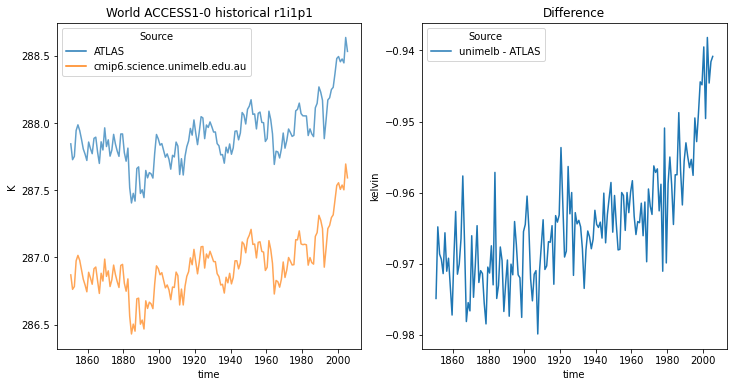

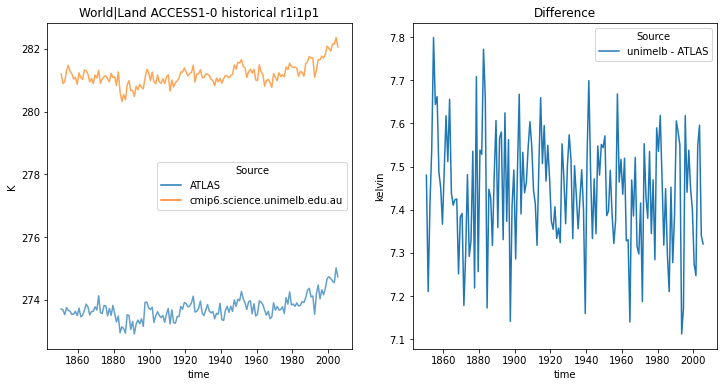

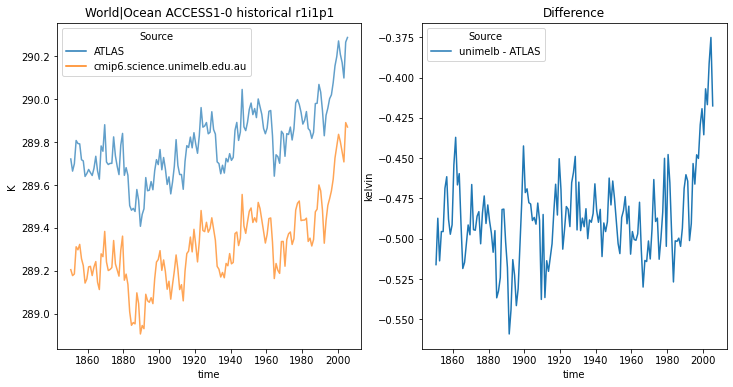

Filtered ScmRun is empty!


No atlas data for ensemble member r2i1p1 for {'climate_model': 'ACCESS1-0', 'scenario': 'historical'}


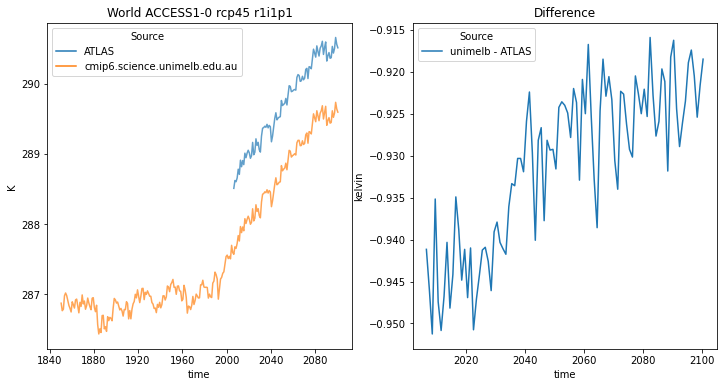

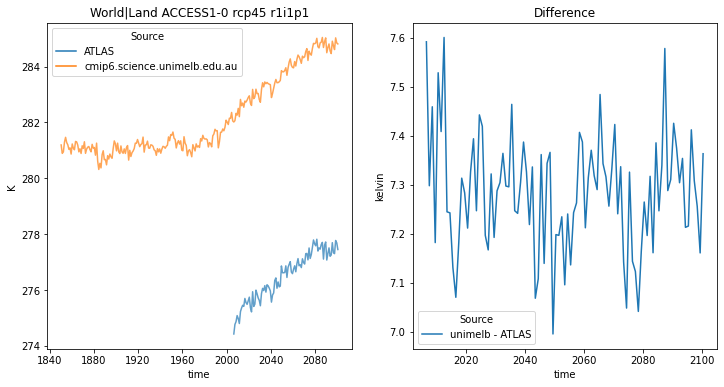

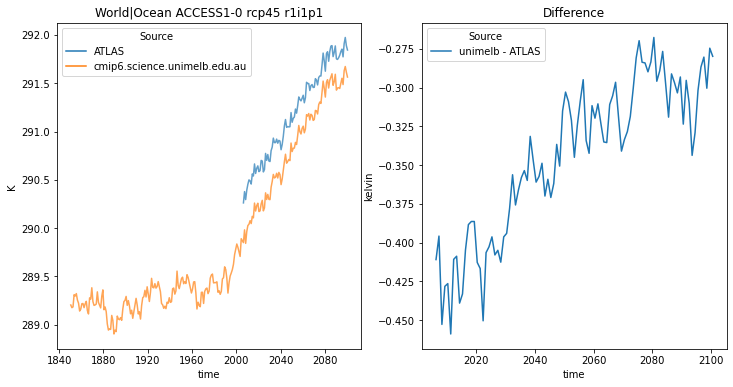

In [13]:
N_TO_SHOW = 2
PRINT_MISSING = True
group_cols = ["climate_model", "scenario", "member_id"]
region_pairs = (
    ("landsea", "World"),
    ("land", "World|Land"),
    ("sea", "World|Ocean"),
)
i = 0
for j, single_run in enumerate(tqdman.tqdm(db.groupby(group_cols))):
    load_keys = {
        k: single_run.get_unique_meta(k, no_duplicates=True) 
        for k in group_cols if k != "member_id"
    }
    try:
        atlas_data = atlas_database.load(**load_keys).filter(region="World")
    except ValueError:
        if PRINT_MISSING:
            print(f"No atlas data for {load_keys}")
        continue
    
    member_id = single_run.get_unique_meta("member_id", no_duplicates=True)
    atlas_data = atlas_data.filter(member_id=member_id)
    if atlas_data.empty:
        if PRINT_MISSING:
            print(f"No atlas data for ensemble member {member_id} for {load_keys}")
        continue
        
    atlas_data["Source"] = "ATLAS"
    single_run["Source"] = "cmip6.science.unimelb.edu.au"
        
    pdf = scmdata.run_append([atlas_data, single_run])
    for atlas_mask, netcdf_scm_region in region_pairs:
        fig, axes = plt.subplots(figsize=(12, 6), ncols=2)
        pdf_region = scmdata.run_append([
            pdf.filter(mask=atlas_mask),
            pdf.filter(region=netcdf_scm_region, Source="*unimelb*")
        ])
        
        ax = pdf_region.time_mean("AC").convert_unit("K").lineplot(ax=axes[0], hue="Source", alpha=0.7)
        axes[0].set_title(f"{netcdf_scm_region} {load_keys['climate_model']} {load_keys['scenario']} {member_id}")
        
        pdf_diff = pdf_region.drop_meta(["activity_id", "mask"]).time_mean("AC")
        pdf_diff["region"] = netcdf_scm_region
        pdf_diff.filter(Source="*unimelb*").subtract(
            pdf_diff.filter(Source="ATLAS"),
            op_cols={"Source": "unimelb - ATLAS"}
        ).lineplot(ax=axes[1], hue="Source")
        axes[1].set_title("Difference")
        
        plt.show()

    i += 1
    if i >= N_TO_SHOW:
        break

In [14]:
pdf_region.filter(year=range(2006, 2011)).timeseries()

time                                                                                                                          2006-01-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                    17.177   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-01-15 12:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                    289.57   

time                                                                                                                          2006-02-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                    17.348   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-02-14 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                    289.69   

time                                                                                                                          2006-03-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                    17.437   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-03-15 12:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                   289.783   

time                                                                                                                          2006-04-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    degC tas 

In [15]:
pdf_region.filter(year=range(2006, 2011)).convert_unit("K").timeseries()

time                                                                                                                          2006-01-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                   290.327   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-01-15 12:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                    289.57   

time                                                                                                                          2006-02-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                   290.498   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-02-14 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                    289.69   

time                                                                                                                          2006-03-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                   290.587   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                       NaN   

time                                                                                                                          2006-03-15 12:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas                       NaN   
cmip6.science.unimelb.edu.au cmip5       ACCESS1-0     NaN  r1i1p1    CMIP5   unspecified World|Ocean rcp45    K    tas                   289.783   

time                                                                                                                          2006-04-07 00:00:00  \
Source                       activity_id climate_model mask member_id mip_era model       region      scenario unit variable                        
ATLAS                        NaN         ACCESS1-0     sea  r1i1p1    CMIP5   unspecified World       rcp45    K    tas 